In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import keras 
from keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
import tensorflow as tf
#from sklearn.metrics import confusion_matrix 
import seaborn as sns 
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical
from dataclasses import dataclass

np.random.seed(0) 

In [2]:
fashion_train = pd.read_csv('fashion-mnist_train.csv' , delimiter = ',')
fashion_test = pd.read_csv('fashion-mnist_test.csv' , delimiter =',')

In [3]:

print(fashion_train.shape)
print(fashion_test.shape)
print(set(fashion_train['label']))
print([fashion_train.drop(labels='label', axis=1).min(axis=1).min(), 
      fashion_train.drop(labels='label', axis=1).max(axis=1).max()])

(60000, 785)
(10000, 785)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
[0, 255]


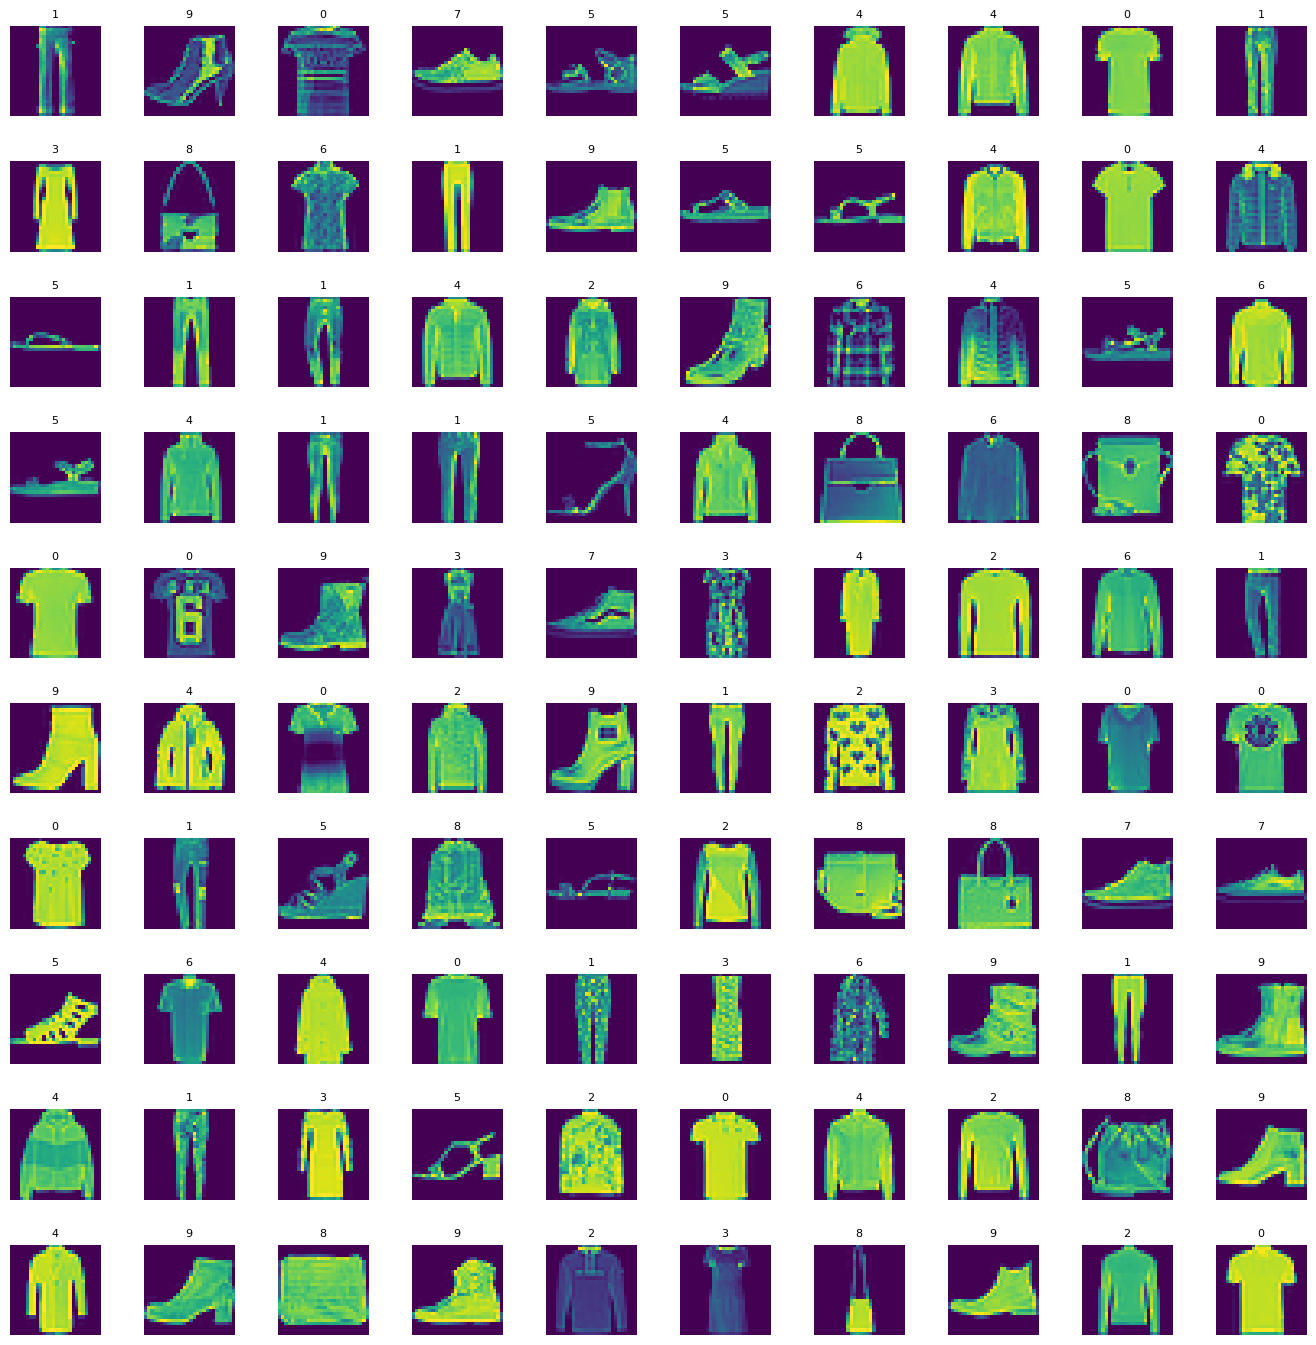

In [4]:
training = np.asarray(fashion_train, dtype='float32')


height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(17,17))
axes = axes.ravel()  
n_train = len(training)

for i in range(0, height*width):
    index = np.random.randint(0, n_train)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(int(training[index, 0]), fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.5)

In [5]:
x_train = np.genfromtxt('train_images.csv', delimiter=',', dtype=float)
y_train = np.genfromtxt('train_labels.csv', delimiter=',', dtype=int)

x_test = np.genfromtxt('test_images.csv', delimiter=',', dtype=float)
y_test = np.genfromtxt('test_labels.csv', delimiter=',', dtype=int)

In [6]:
x_train = np.genfromtxt('train_images.csv', delimiter=',', dtype=float, skip_header=1)
y_train = np.genfromtxt('train_labels.csv', delimiter=',', dtype=float, skip_header=1)
x_test = np.genfromtxt('test_images.csv', delimiter=',', dtype=float, skip_header=1)
y_test = np.genfromtxt('test_labels.csv', delimiter=',', dtype=float, skip_header=1)


In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [8]:
x_train = x_train.reshape(60000, 28, 28)
x_test = x_test.reshape(10000, 28, 28)

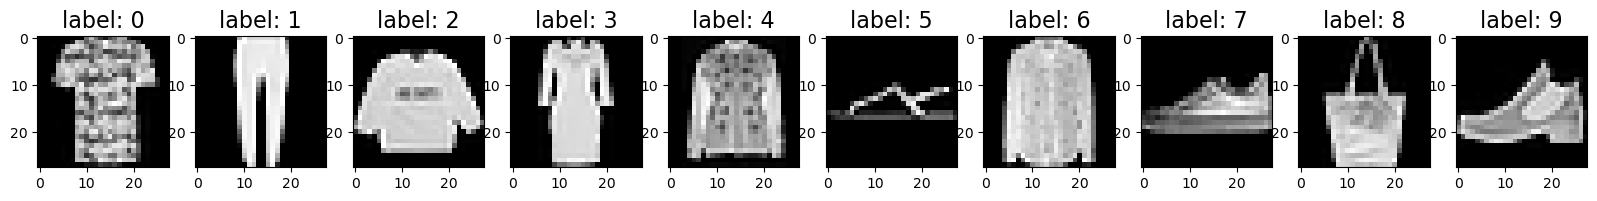

In [9]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes) :
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("label: {}".format(i), fontsize=16)

In [10]:
for i in range(10):
    print(y_train[i])

2.0
9.0
6.0
0.0
3.0
4.0
4.0
5.0
4.0
8.0


In [11]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [12]:
for i in range(10):
    print(y_train[i])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [13]:

x_train = x_train / 255.0
x_test = x_test / 255.0

In [14]:

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [15]:

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [16]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES: int=10
    IMG_HEIGHT:  int=32
    IMG_WIDTH:   int=32
    NUM_CHANNELS:  int=3
        
@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:      int= 20
    BATCH_SIZE:   int=256
    LEARNING_RATE:  float = 0.001

In [98]:

def model(input_shape=(784,)):
    model = Sequential()
    model.add(Dense(units=128, input_shape=input_shape, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=10, activation='softmax'))
    
    
    return model
    

In [99]:

model=model(input_shape=(784,))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'],
             )

In [101]:

history = model.fit(x_train, 
                   y_train,
                   batch_size=784,
                   epochs=20,
                   verbose=1,
                   validation_split=0.3,
                   )

Epoch 1/20
54/54 [==============================] - 3s 21ms/step - loss: 0.9924 - accuracy: 0.6660 - val_loss: 0.5802 - val_accuracy: 0.8089
Epoch 2/20
54/54 [==============================] - 1s 18ms/step - loss: 0.5624 - accuracy: 0.8059 - val_loss: 0.4932 - val_accuracy: 0.8315
Epoch 3/20
54/54 [==============================] - 1s 20ms/step - loss: 0.4851 - accuracy: 0.8311 - val_loss: 0.4491 - val_accuracy: 0.8408
Epoch 4/20
54/54 [==============================] - 1s 19ms/step - loss: 0.4485 - accuracy: 0.8420 - val_loss: 0.4255 - val_accuracy: 0.8519
Epoch 5/20
54/54 [==============================] - 1s 18ms/step - loss: 0.4172 - accuracy: 0.8537 - val_loss: 0.4000 - val_accuracy: 0.8607
Epoch 6/20
54/54 [==============================] - 1s 18ms/step - loss: 0.3963 - accuracy: 0.8592 - val_loss: 0.3923 - val_accuracy: 0.8624
Epoch 7/20
54/54 [==============================] - 1s 18ms/step - loss: 0.3818 - accuracy: 0.8654 - val_loss: 0.3785 - val_accuracy: 0.8660
Epoch 8/20
54

In [102]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    
    fig, ax = plt.subplots(figsize=(15,4))
    
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
        
    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])
    
    
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('id'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()
    

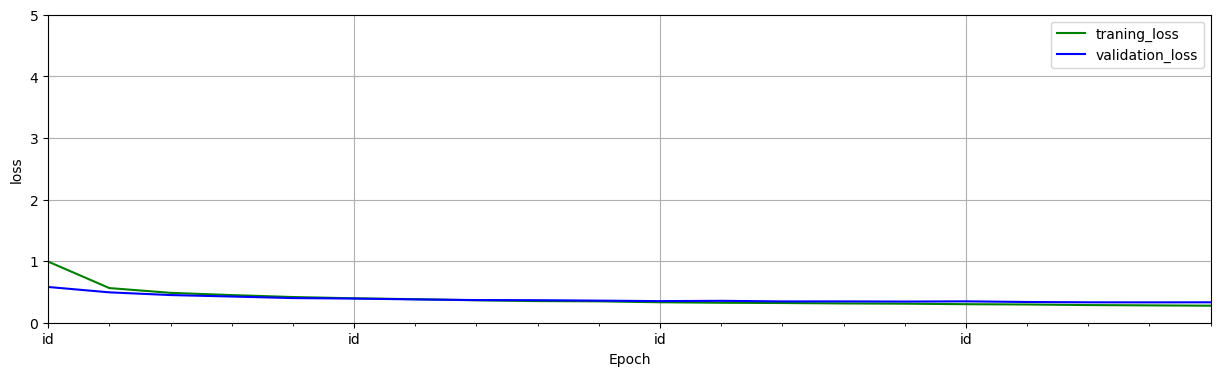

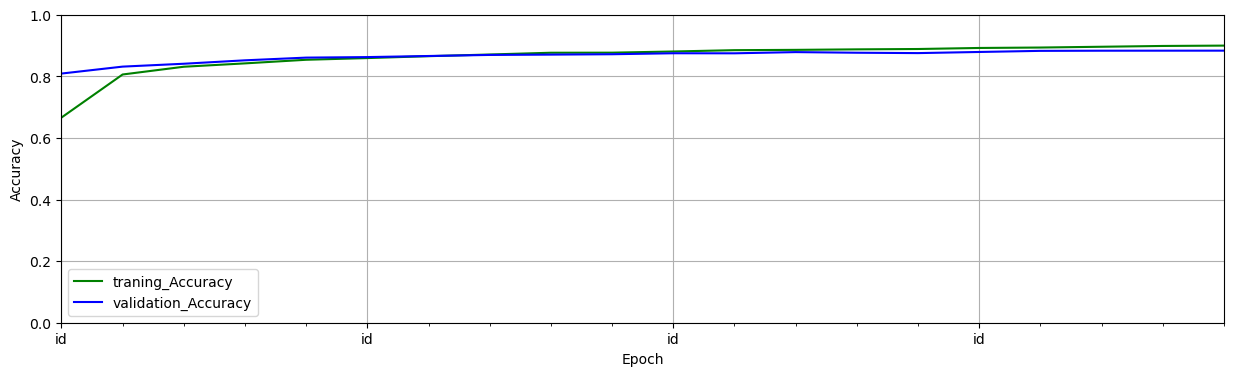

In [103]:

train_loss= history.history["loss"]
train_acc= history.history["accuracy"]
valid_loss= history.history["val_loss"]
valid_acc= history.history["val_accuracy"]

plot_results([ train_loss, valid_loss],
            ylabel="loss",
            ylim=[0.0, 5.0],
            metric_name=["traning_loss", "validation_loss"],
            color=["g","b"])

plot_results([train_acc, valid_acc],
            ylabel="Accuracy",
            ylim=[0.0, 1.0],
            metric_name=["traning_Accuracy", "validation_Accuracy"],
            color=['g','b'])

In [104]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [105]:

from tensorflow.keras import models
reloaded_model = models.load_model('model')

In [106]:

test_loss, test_acc = reloaded_model.evaluate(x_test, y_test)
print(f"test accuracy: {test_acc*100:0.3f} ")

313/313 [==============================] - 1s 3ms/step - loss: 0.3152 - accuracy: 0.8850
test accuracy: 88.500 


In [107]:

def evaluate_model(dataset, model):
    class_names = ['t-shirt',
                  'pants',
                  'sweater',
                  'dress',
                  'jacket',
                  'sandals',
                  'shirt',
                  'sneekers',
                  'bag',
                  'boots' ]
    num_rows = 3
    num_cols = 6
    
    
    data_batch = dataset[0:num_rows*num_cols]
    
    predictions = model.predict(data_batch)
    
    plt.figure(figsize=(20,8))
    num_matches=0
    
    for idx in range (num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx].reshape(28, 28))
        
        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])
        
        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={'fontsize':13})
        
        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color='g')
        else :
            plt.setp(title_obj, color='r')
            
        acc = num_matches/(idx+1)
        
    print ("prediction accuracy:", int(100*acc)/100)
    
    return

1/1 [==============================] - 0s 73ms/step
prediction accuracy: 0.83


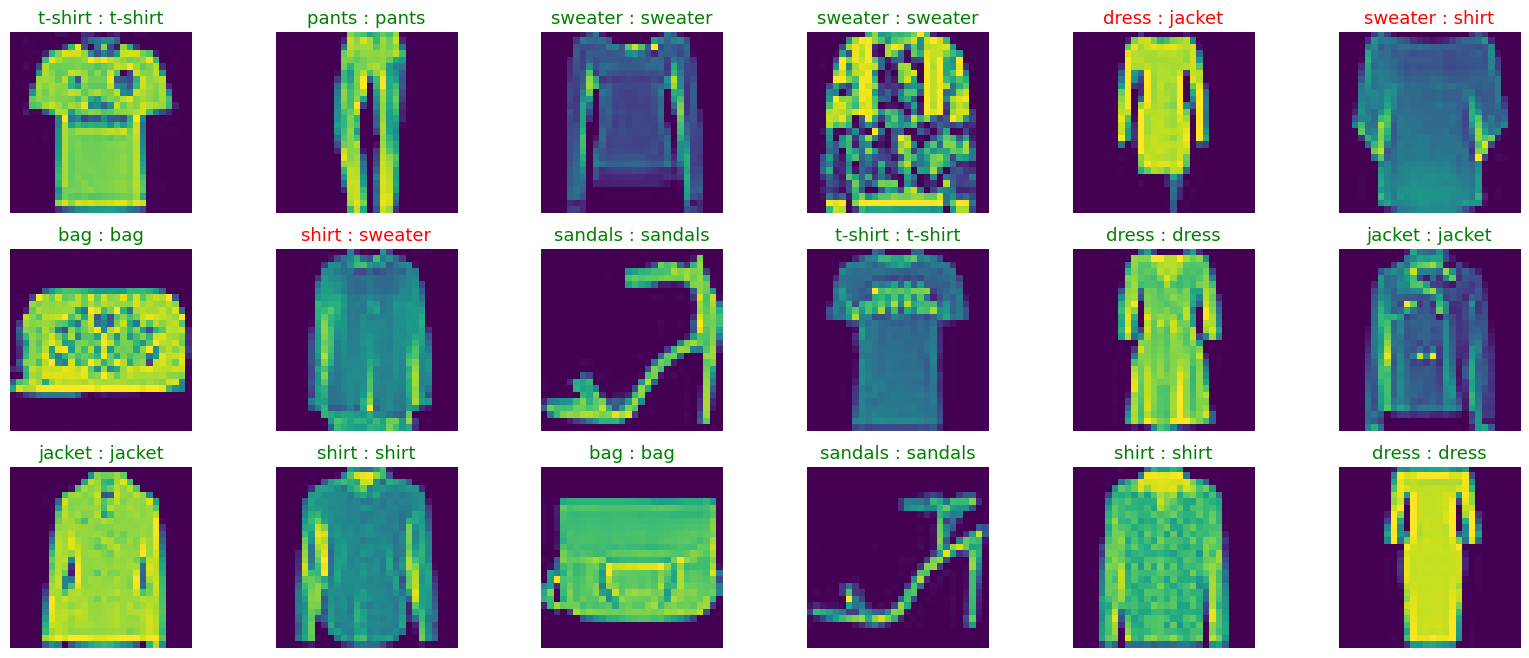

In [108]:

evaluate_model(x_test, reloaded_model)

In [74]:
def model_1(input_shape=(784,)):
    model = Sequential()
    model.add(Dense(units=128, input_shape=input_shape, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    
    
    return model

In [76]:
model_1=model_1(input_shape=(784,))
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'],
             )

In [79]:
history_1 = model_1.fit(x_train, 
                   y_train,
                   batch_size=256,
                   epochs=20,
                   verbose=1,
                   validation_split=0.3,
                   )

Epoch 1/20
165/165 [==============================] - 1s 7ms/step - loss: 0.4134 - accuracy: 0.8546 - val_loss: 0.5186 - val_accuracy: 0.8208
Epoch 2/20
165/165 [==============================] - 1s 7ms/step - loss: 0.3791 - accuracy: 0.8663 - val_loss: 0.4503 - val_accuracy: 0.8481
Epoch 3/20
165/165 [==============================] - 1s 7ms/step - loss: 0.3613 - accuracy: 0.8712 - val_loss: 0.4043 - val_accuracy: 0.8545
Epoch 4/20
165/165 [==============================] - 1s 7ms/step - loss: 0.3335 - accuracy: 0.8809 - val_loss: 0.3675 - val_accuracy: 0.8714
Epoch 5/20
165/165 [==============================] - 1s 7ms/step - loss: 0.3146 - accuracy: 0.8869 - val_loss: 0.3500 - val_accuracy: 0.8754
Epoch 6/20
165/165 [==============================] - 1s 7ms/step - loss: 0.3065 - accuracy: 0.8889 - val_loss: 0.3567 - val_accuracy: 0.8731
Epoch 7/20
165/165 [==============================] - 1s 7ms/step - loss: 0.2980 - accuracy: 0.8916 - val_loss: 0.3763 - val_accuracy: 0.8672
Epoch 

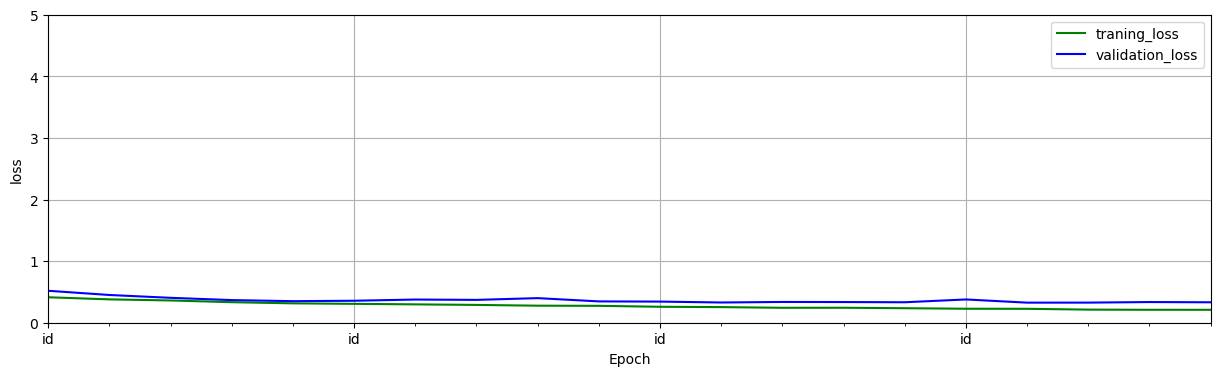

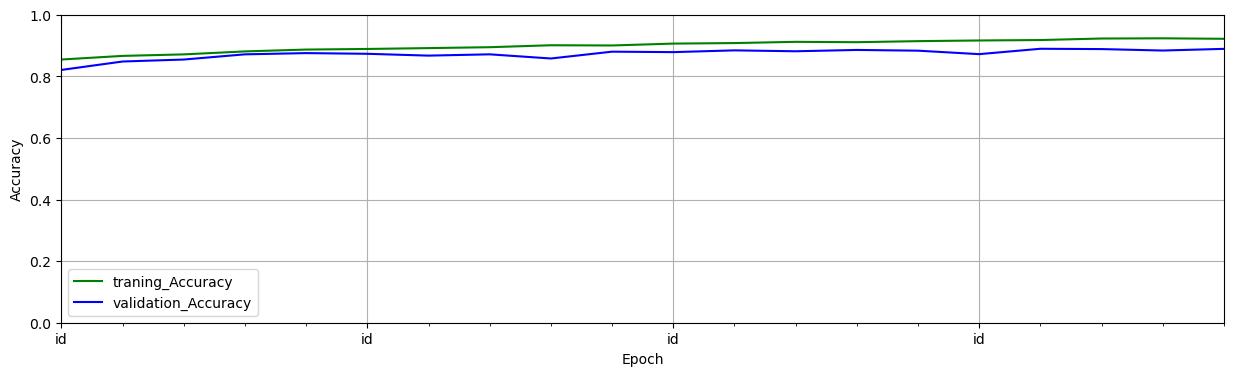

In [80]:
train_loss= history_1.history["loss"]
train_acc= history_1.history["accuracy"]
valid_loss= history_1.history["val_loss"]
valid_acc= history_1.history["val_accuracy"]

plot_results([ train_loss, valid_loss],
            ylabel="loss",
            ylim=[0.0, 5.0],
            metric_name=["traning_loss", "validation_loss"],
            color=["g","b"])

plot_results([train_acc, valid_acc],
            ylabel="Accuracy",
            ylim=[0.0, 1.0],
            metric_name=["traning_Accuracy", "validation_Accuracy"],
            color=['g','b'])

In [81]:
model.save('model_1')

INFO:tensorflow:Assets written to: model_1\assets


INFO:tensorflow:Assets written to: model_1\assets


In [82]:
from tensorflow.keras import models
reloaded_model = models.load_model('model_1')

In [83]:

test_loss, test_acc = reloaded_model.evaluate(x_test, y_test)
print(f"test accuracy: {test_acc*100:0.3f} ")

313/313 [==============================] - 1s 3ms/step - loss: 0.3558 - accuracy: 0.8752
test accuracy: 87.520 


1/1 [==============================] - 0s 300ms/step
prediction accuracy: 0.83


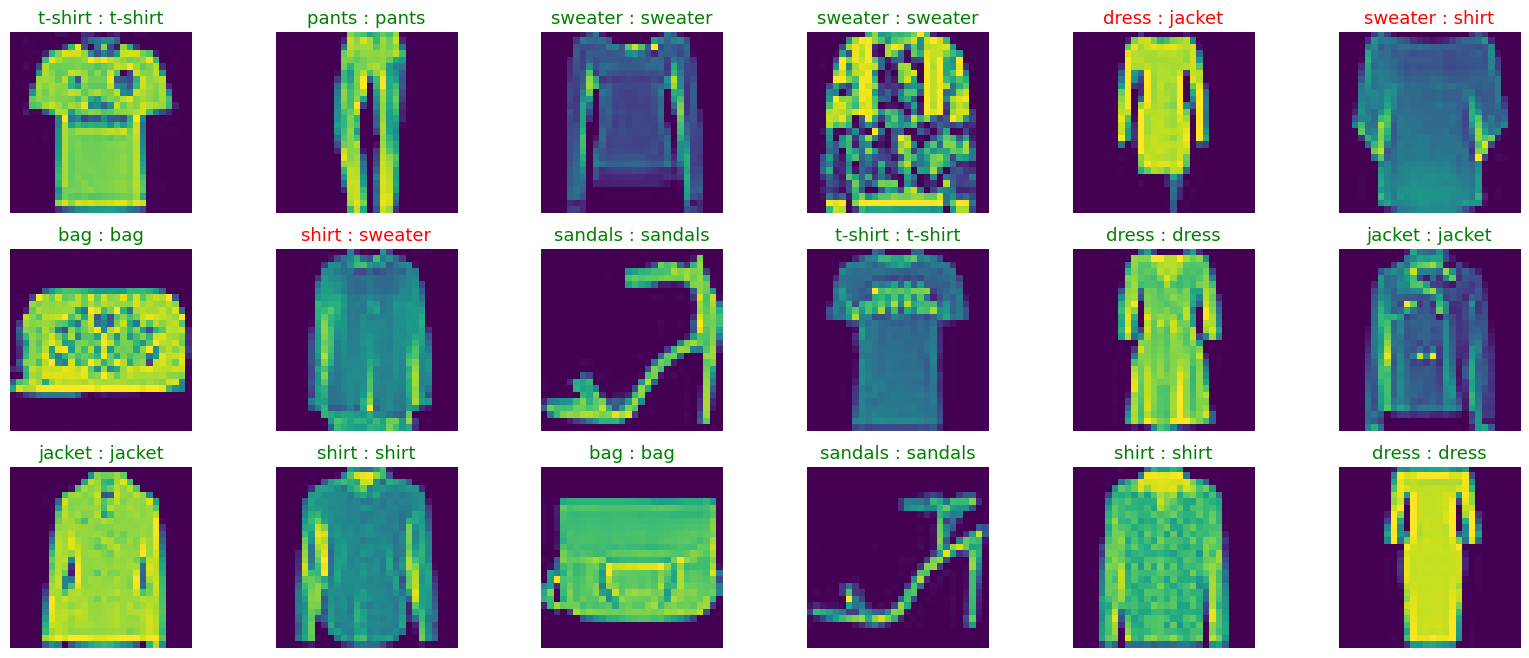

In [84]:

evaluate_model(x_test, reloaded_model)

In [30]:
def model_2(input_shape=(784,)):
    model = Sequential()
    model.add(Dense(units=128, input_shape=input_shape, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    
    
    return model

In [31]:
model_2=model_2(input_shape=(784,))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 117706 (459.79 KB)
Trainable params: 117706 (459.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'],
             )

In [34]:
history_2 = model_2.fit(x_train, 
                   y_train,
                   batch_size=TrainingConfig.BATCH_SIZE,
                   epochs=TrainingConfig.EPOCHS,
                   verbose=1,
                   validation_split=0.3,
                   )

Epoch 1/20
165/165 [==============================] - 3s 7ms/step - loss: 0.7036 - accuracy: 0.7565 - val_loss: 0.5286 - val_accuracy: 0.8111
Epoch 2/20
165/165 [==============================] - 1s 5ms/step - loss: 0.4391 - accuracy: 0.8456 - val_loss: 0.4716 - val_accuracy: 0.8249
Epoch 3/20
165/165 [==============================] - 1s 5ms/step - loss: 0.3977 - accuracy: 0.8604 - val_loss: 0.4127 - val_accuracy: 0.8551
Epoch 4/20
165/165 [==============================] - 1s 5ms/step - loss: 0.3706 - accuracy: 0.8668 - val_loss: 0.3947 - val_accuracy: 0.8641
Epoch 5/20
165/165 [==============================] - 1s 5ms/step - loss: 0.3462 - accuracy: 0.8742 - val_loss: 0.3683 - val_accuracy: 0.8695
Epoch 6/20
165/165 [==============================] - 1s 6ms/step - loss: 0.3281 - accuracy: 0.8817 - val_loss: 0.3922 - val_accuracy: 0.8577
Epoch 7/20
165/165 [==============================] - 1s 6ms/step - loss: 0.3144 - accuracy: 0.8853 - val_loss: 0.3466 - val_accuracy: 0.8750
Epoch 

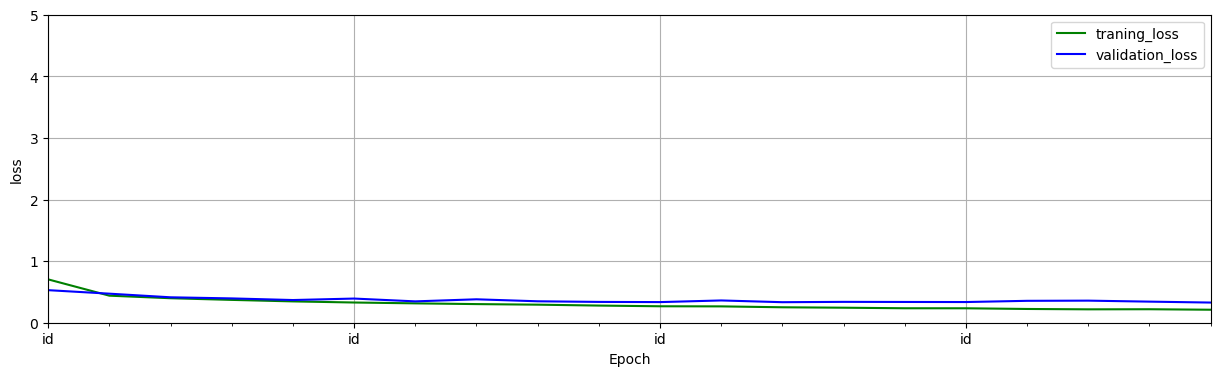

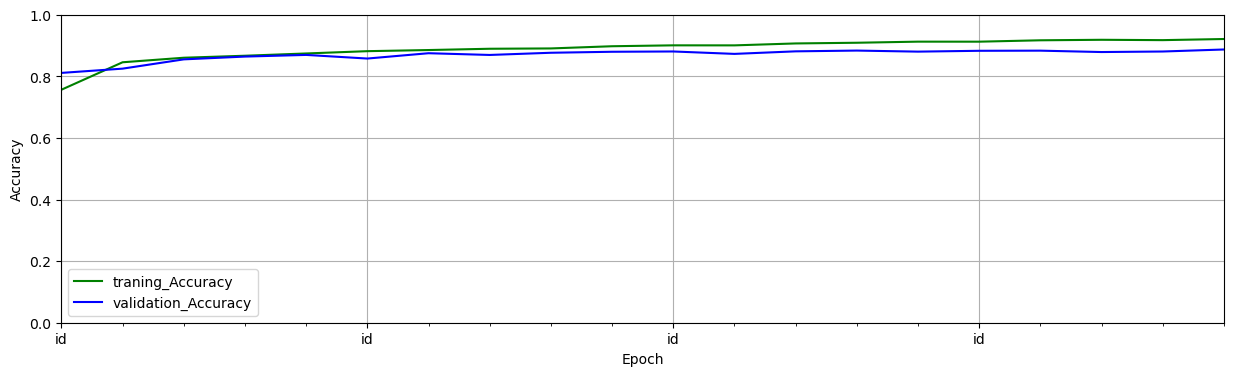

In [36]:
train_loss= history_2.history["loss"]
train_acc= history_2.history["accuracy"]
valid_loss= history_2.history["val_loss"]
valid_acc= history_2.history["val_accuracy"]

plot_results([ train_loss, valid_loss],
            ylabel="loss",
            ylim=[0.0, 5.0],
            metric_name=["traning_loss", "validation_loss"],
            color=["g","b"])

plot_results([train_acc, valid_acc],
            ylabel="Accuracy",
            ylim=[0.0, 1.0],
            metric_name=["traning_Accuracy", "validation_Accuracy"],
            color=['g','b'])

In [37]:
model_2.save('model_2')

INFO:tensorflow:Assets written to: model_2\assets


INFO:tensorflow:Assets written to: model_2\assets


In [39]:
from tensorflow.keras import models
reloaded_model = models.load_model('model_2')

In [40]:
test_loss, test_acc = reloaded_model.evaluate(x_test, y_test)
print(f"test accuracy: {test_acc*100:0.3f} ")

313/313 [==============================] - 1s 2ms/step - loss: 0.3179 - accuracy: 0.8870
test accuracy: 88.700 


In [41]:
def evaluate_model(dataset, model):
    class_names = ['t-shirt',
                  'pants',
                  'sweater',
                  'dress',
                  'jacket',
                  'sandals',
                  'shirt',
                  'sneekers',
                  'bag',
                  'boots' ]
    num_rows = 3
    num_cols = 6
    
    
    data_batch = dataset[0:num_rows*num_cols]
    
    predictions = model.predict(data_batch)
    
    plt.figure(figsize=(20,8))
    num_matches=0
    
    for idx in range (num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx].reshape(28, 28))
        
        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])
        
        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={'fontsize':13})
        
        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color='g')
        else :
            plt.setp(title_obj, color='r')
            
        acc = num_matches/(idx+1)
        
    print ("prediction accuracy:", int(100*acc)/100)
    
    return

1/1 [==============================] - 0s 120ms/step
prediction accuracy: 0.72


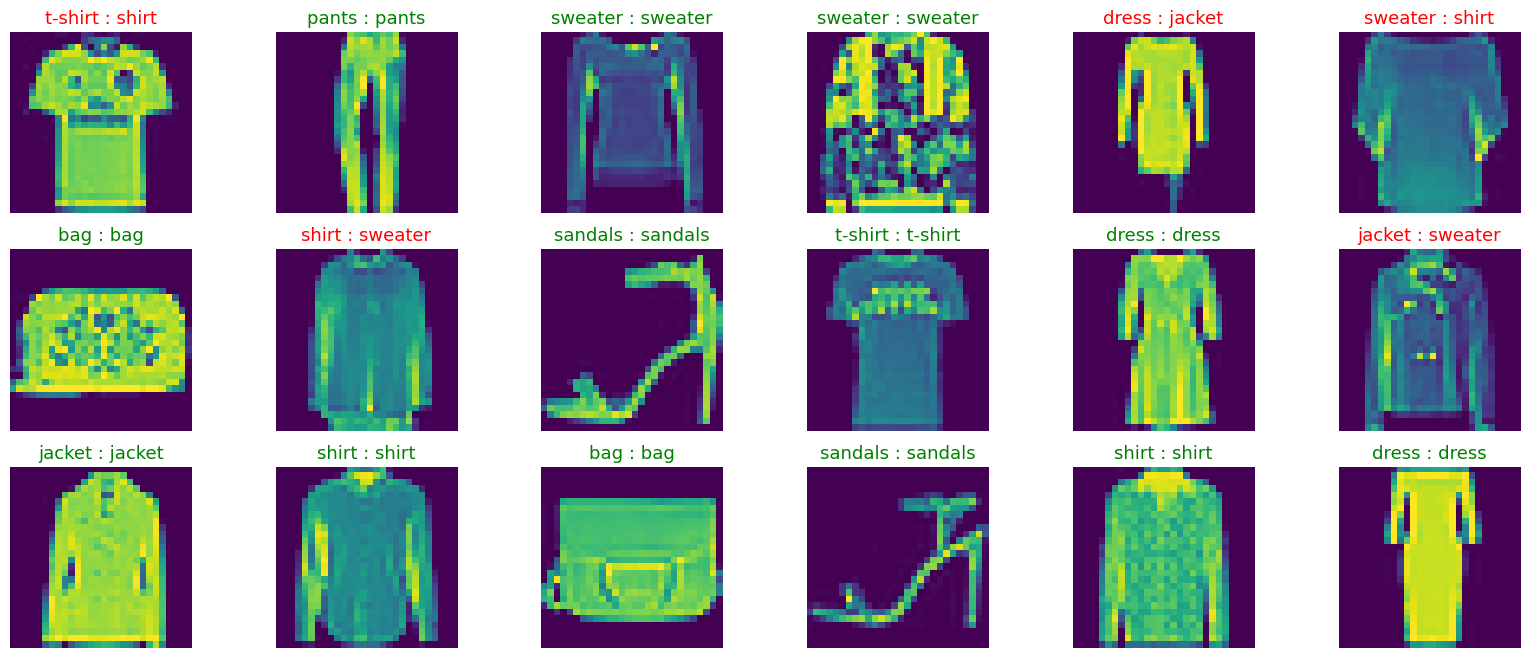

In [42]:
evaluate_model(x_test, reloaded_model)

In [44]:
def model_3(input_shape=(784,)):
    model = Sequential()
    model.add(Dense(units=128, input_shape=input_shape, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    
    
    return model

In [45]:
model_3=model_3(input_shape=(784,))
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model_3.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'],
             )

In [47]:
history_3 = model_3.fit(x_train, 
                   y_train,
                   batch_size=TrainingConfig.BATCH_SIZE,
                   epochs=TrainingConfig.EPOCHS,
                   verbose=1,
                   validation_split=0.3,
                   )

Epoch 1/20
165/165 [==============================] - 3s 7ms/step - loss: 0.6741 - accuracy: 0.7707 - val_loss: 0.5096 - val_accuracy: 0.8259
Epoch 2/20
165/165 [==============================] - 1s 5ms/step - loss: 0.4571 - accuracy: 0.8410 - val_loss: 0.4725 - val_accuracy: 0.8312
Epoch 3/20
165/165 [==============================] - 1s 5ms/step - loss: 0.4153 - accuracy: 0.8539 - val_loss: 0.4505 - val_accuracy: 0.8390
Epoch 4/20
165/165 [==============================] - 1s 5ms/step - loss: 0.3842 - accuracy: 0.8646 - val_loss: 0.4193 - val_accuracy: 0.8539
Epoch 5/20
165/165 [==============================] - 1s 5ms/step - loss: 0.3663 - accuracy: 0.8702 - val_loss: 0.4036 - val_accuracy: 0.8558
Epoch 6/20
165/165 [==============================] - 1s 5ms/step - loss: 0.3453 - accuracy: 0.8770 - val_loss: 0.3753 - val_accuracy: 0.8684
Epoch 7/20
165/165 [==============================] - 1s 5ms/step - loss: 0.3346 - accuracy: 0.8816 - val_loss: 0.3800 - val_accuracy: 0.8661
Epoch 

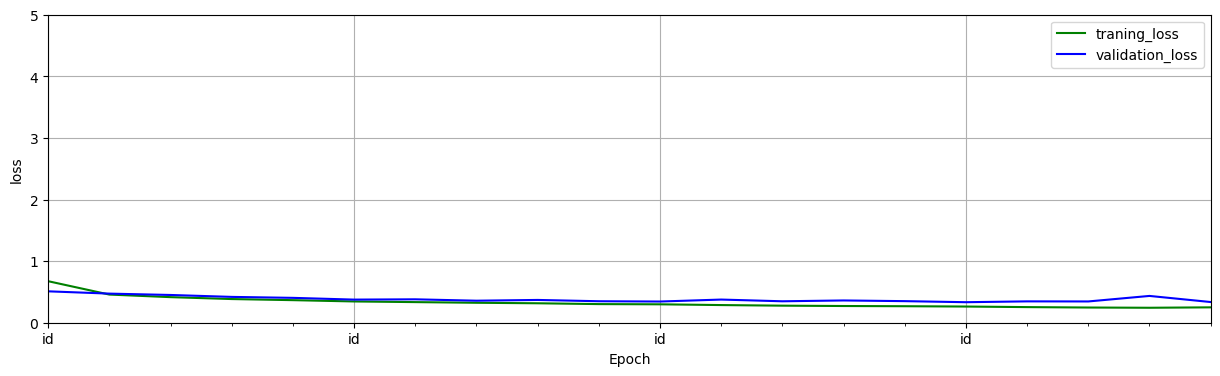

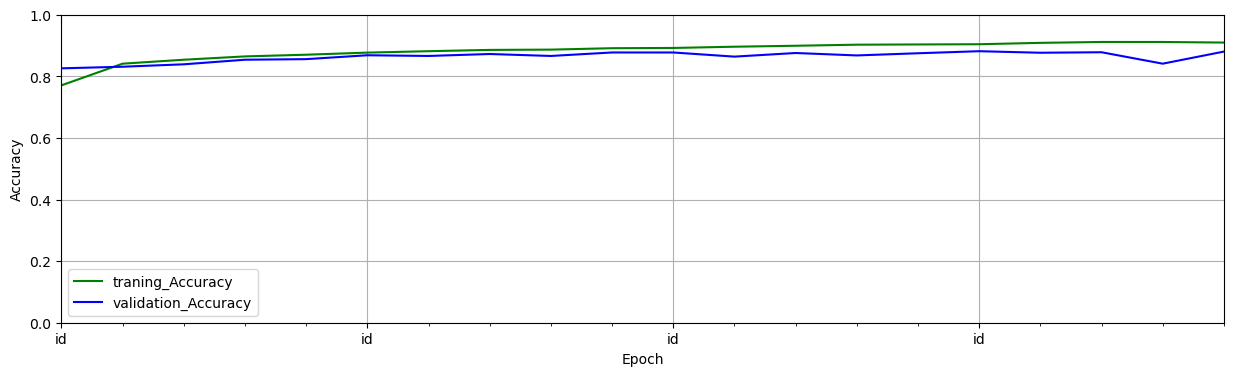

In [48]:
train_loss= history_3.history["loss"]
train_acc= history_3.history["accuracy"]
valid_loss= history_3.history["val_loss"]
valid_acc= history_3.history["val_accuracy"]

plot_results([ train_loss, valid_loss],
            ylabel="loss",
            ylim=[0.0, 5.0],
            metric_name=["traning_loss", "validation_loss"],
            color=["g","b"])

plot_results([train_acc, valid_acc],
            ylabel="Accuracy",
            ylim=[0.0, 1.0],
            metric_name=["traning_Accuracy", "validation_Accuracy"],
            color=['g','b'])

In [49]:
model_3.save('model_3')

INFO:tensorflow:Assets written to: model_3\assets


INFO:tensorflow:Assets written to: model_3\assets


In [50]:
from tensorflow.keras import models
reloaded_model = models.load_model('model_3')

In [51]:
test_loss, test_acc = reloaded_model.evaluate(x_test, y_test)
print(f"test accuracy: {test_acc*100:0.3f} ")

313/313 [==============================] - 1s 2ms/step - loss: 0.3235 - accuracy: 0.8841
test accuracy: 88.410 


In [52]:
def evaluate_model(dataset, model):
    class_names = ['t-shirt',
                  'pants',
                  'sweater',
                  'dress',
                  'jacket',
                  'sandals',
                  'shirt',
                  'sneekers',
                  'bag',
                  'boots' ]
    num_rows = 3
    num_cols = 6
    
    
    data_batch = dataset[0:num_rows*num_cols]
    
    predictions = model.predict(data_batch)
    
    plt.figure(figsize=(20,8))
    num_matches=0
    
    for idx in range (num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx].reshape(28, 28))
        
        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])
        
        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={'fontsize':13})
        
        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color='g')
        else :
            plt.setp(title_obj, color='r')
            
        acc = num_matches/(idx+1)
        
    print ("prediction accuracy:", int(100*acc)/100)
    
    return

1/1 [==============================] - 0s 70ms/step
prediction accuracy: 0.77


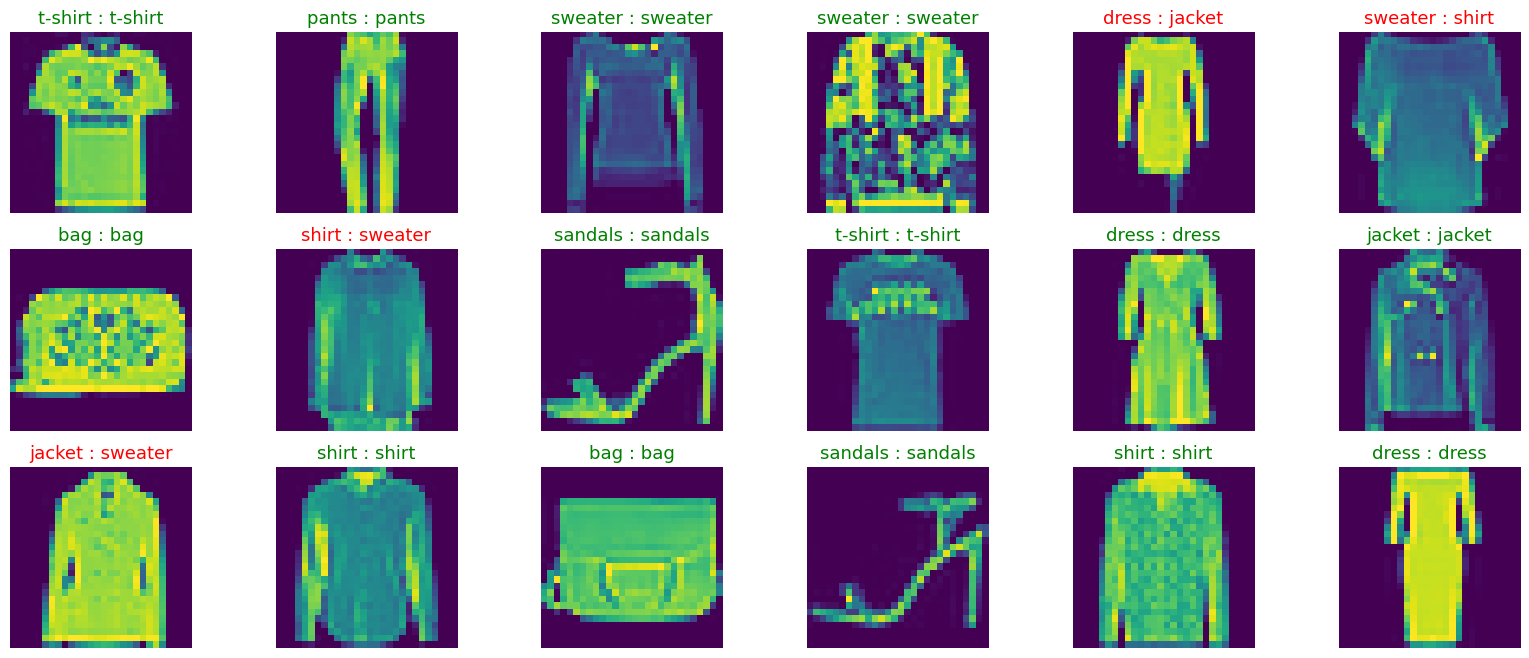

In [53]:
evaluate_model(x_test, reloaded_model)

In [41]:
def model_underfit(input_shape=(784,)):
    model = Sequential()
    model.add(Dense(units=128, input_shape=input_shape, activation='relu'))
    model.add(Dense(units=1, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    
    
    return model

In [42]:
model_underfit=model_underfit(input_shape=(784,))
model_underfit.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
 dense_8 (Dense)             (None, 10)                20        
                                                                 
Total params: 100629 (393.08 KB)
Trainable params: 100629 (393.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model_underfit.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'],
             )

In [44]:
history_underfit = model_underfit.fit(x_train, 
                   y_train,
                   batch_size=TrainingConfig.BATCH_SIZE,
                   epochs=TrainingConfig.EPOCHS,
                   verbose=1,
                   validation_split=0.3,
                   )

Epoch 1/20
165/165 [==============================] - 3s 9ms/step - loss: 2.1098 - accuracy: 0.1549 - val_loss: 1.9956 - val_accuracy: 0.1874
Epoch 2/20
165/165 [==============================] - 1s 6ms/step - loss: 1.9143 - accuracy: 0.2049 - val_loss: 1.8533 - val_accuracy: 0.2151
Epoch 3/20
165/165 [==============================] - 1s 6ms/step - loss: 1.7872 - accuracy: 0.2388 - val_loss: 1.7520 - val_accuracy: 0.2412
Epoch 4/20
165/165 [==============================] - 1s 6ms/step - loss: 1.7027 - accuracy: 0.2909 - val_loss: 1.7013 - val_accuracy: 0.3202
Epoch 5/20
165/165 [==============================] - 1s 6ms/step - loss: 1.6487 - accuracy: 0.3212 - val_loss: 1.6381 - val_accuracy: 0.3378
Epoch 6/20
165/165 [==============================] - 1s 6ms/step - loss: 1.5922 - accuracy: 0.3320 - val_loss: 1.5899 - val_accuracy: 0.3407
Epoch 7/20
165/165 [==============================] - 1s 6ms/step - loss: 1.5503 - accuracy: 0.3463 - val_loss: 1.5538 - val_accuracy: 0.3522
Epoch 

In [ ]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    
    fig, ax = plt.subplots(figsize=(15,4))
    
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
        
    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])
    
    
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('id'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()
    

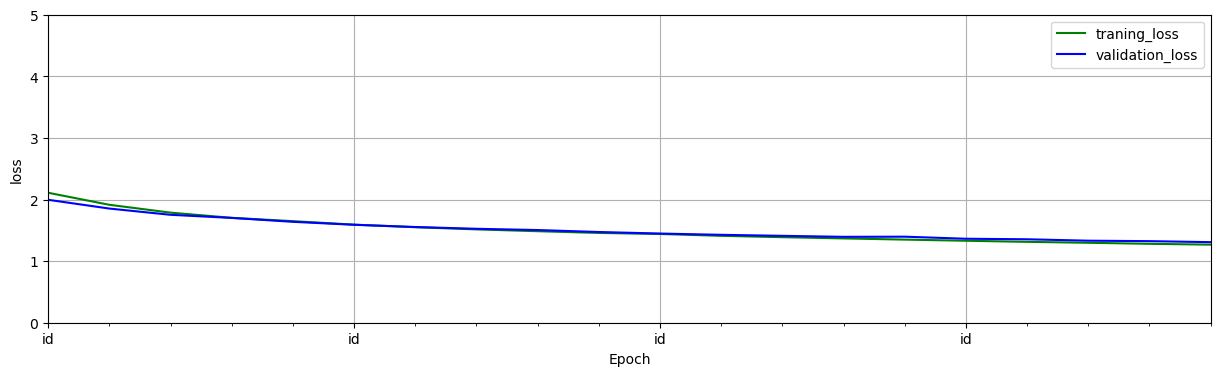

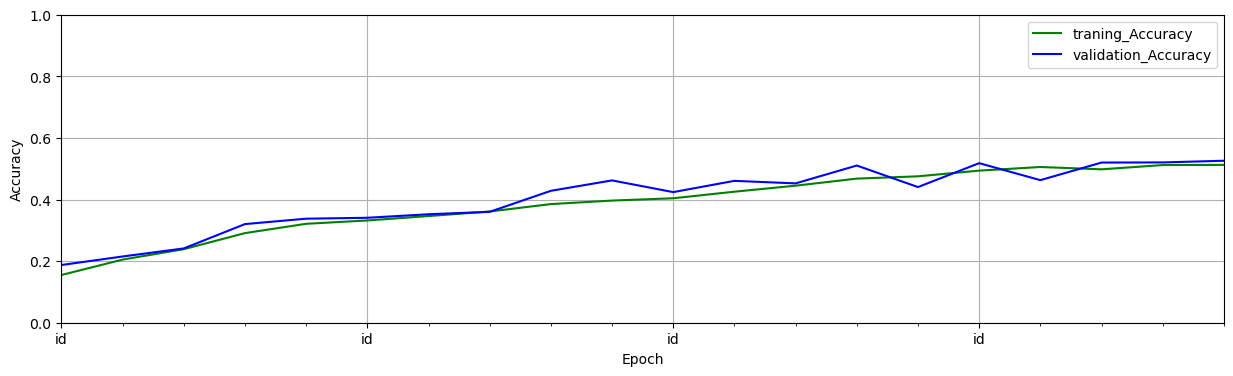

In [48]:
train_loss= history_underfit.history["loss"]
train_acc= history_underfit.history["accuracy"]
valid_loss= history_underfit.history["val_loss"]
valid_acc= history_underfit.history["val_accuracy"]

plot_results([ train_loss, valid_loss],
            ylabel="loss",
            ylim=[0.0, 5.0],
            metric_name=["traning_loss", "validation_loss"],
            color=["g","b"])

plot_results([train_acc, valid_acc],
            ylabel="Accuracy",
            ylim=[0.0, 1.0],
            metric_name=["traning_Accuracy", "validation_Accuracy"],
            color=['g','b'])

In [49]:
model_underfit.save('model_underfit')

INFO:tensorflow:Assets written to: model_underfit\assets


INFO:tensorflow:Assets written to: model_underfit\assets


In [50]:
from tensorflow.keras import models
reloaded_model = models.load_model('model_underfit')

In [51]:
test_loss, test_acc = reloaded_model.evaluate(x_test, y_test)
print(f"test accuracy: {test_acc*100:0.3f} ")

313/313 [==============================] - 1s 3ms/step - loss: 1.2931 - accuracy: 0.5239
test accuracy: 52.390 


In [52]:
def evaluate_model(dataset, model):
    class_names = ['t-shirt',
                  'pants',
                  'sweater',
                  'dress',
                  'jacket',
                  'sandals',
                  'shirt',
                  'sneekers',
                  'bag',
                  'boots' ]
    num_rows = 3
    num_cols = 6
    
    
    data_batch = dataset[0:num_rows*num_cols]
    
    predictions = model.predict(data_batch)
    
    plt.figure(figsize=(20,8))
    num_matches=0
    
    for idx in range (num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx].reshape(28, 28))
        
        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])
        
        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={'fontsize':13})
        
        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color='g')
        else :
            plt.setp(title_obj, color='r')
            
        acc = num_matches/(idx+1)
        
    print ("prediction accuracy:", int(100*acc)/100)
    
    return

1/1 [==============================] - 0s 109ms/step
prediction accuracy: 0.44


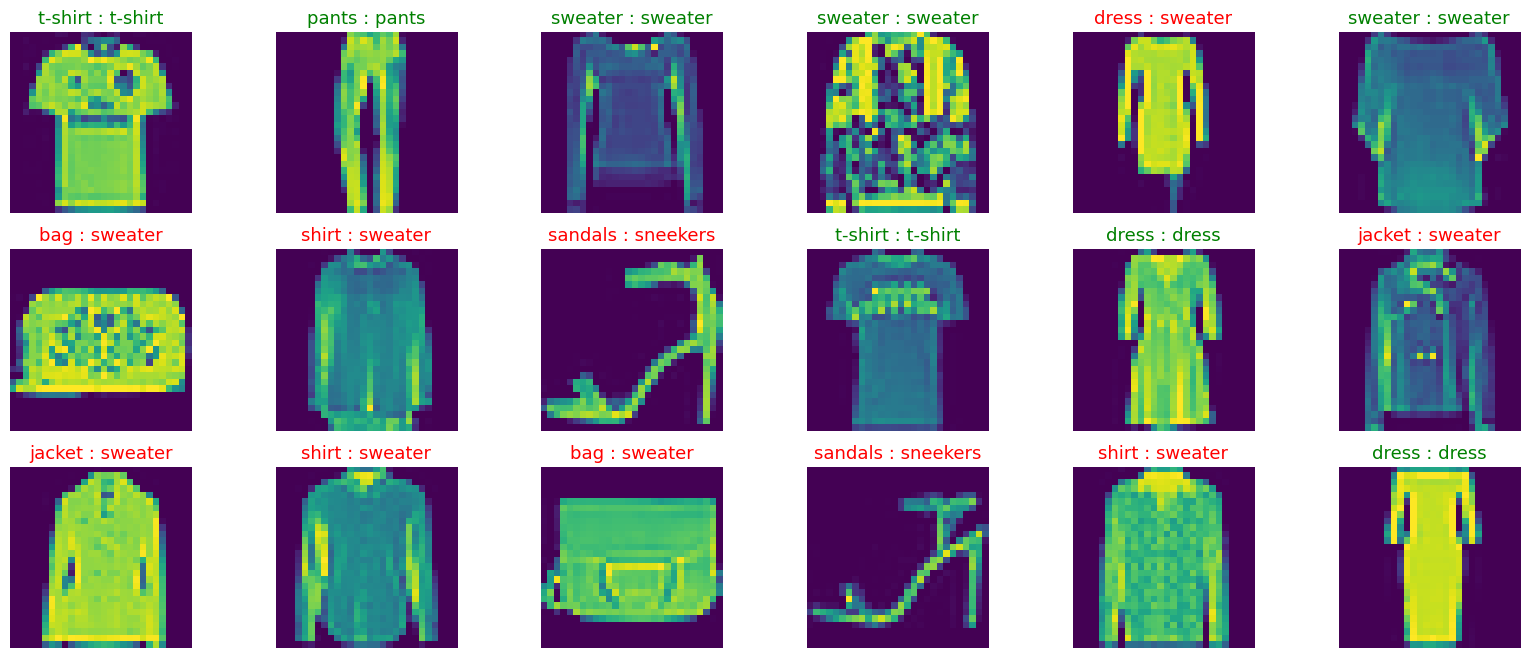

In [53]:
evaluate_model(x_test, reloaded_model)

In [49]:
def model_overfit(input_shape=(784,)):
    model = Sequential()
    model.add(Dense(units=128, input_shape=input_shape, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    
    
    return model

In [50]:
model_overfit=model_overfit(input_shape=(784,))
model_overfit.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model_overfit.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'],
             )

In [58]:
history_overfit = model_overfit.fit(x_train, 
                   y_train,
                   batch_size=256,
                   epochs=25,
                   verbose=1,
                   validation_split=0.3,
                   )

Epoch 1/25
165/165 [==============================] - 2s 10ms/step - loss: 0.2731 - accuracy: 0.8987 - val_loss: 0.4074 - val_accuracy: 0.8653
Epoch 2/25
165/165 [==============================] - 1s 9ms/step - loss: 0.2550 - accuracy: 0.9065 - val_loss: 0.3482 - val_accuracy: 0.8816
Epoch 3/25
165/165 [==============================] - 1s 8ms/step - loss: 0.2434 - accuracy: 0.9110 - val_loss: 0.3700 - val_accuracy: 0.8678
Epoch 4/25
165/165 [==============================] - 1s 8ms/step - loss: 0.2446 - accuracy: 0.9096 - val_loss: 0.3676 - val_accuracy: 0.8744
Epoch 5/25
165/165 [==============================] - 1s 9ms/step - loss: 0.2276 - accuracy: 0.9171 - val_loss: 0.3552 - val_accuracy: 0.8748
Epoch 6/25
165/165 [==============================] - 1s 8ms/step - loss: 0.2265 - accuracy: 0.9163 - val_loss: 0.3300 - val_accuracy: 0.8868
Epoch 7/25
165/165 [==============================] - 1s 9ms/step - loss: 0.2155 - accuracy: 0.9212 - val_loss: 0.3525 - val_accuracy: 0.8818
Epoch

In [59]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    
    fig, ax = plt.subplots(figsize=(15,4))
    
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
        
    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])
    
    
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('id'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()
    

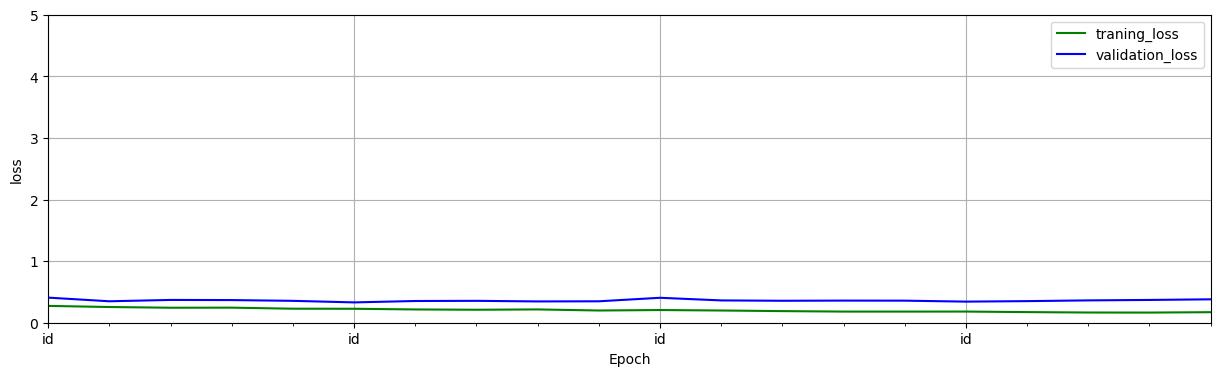

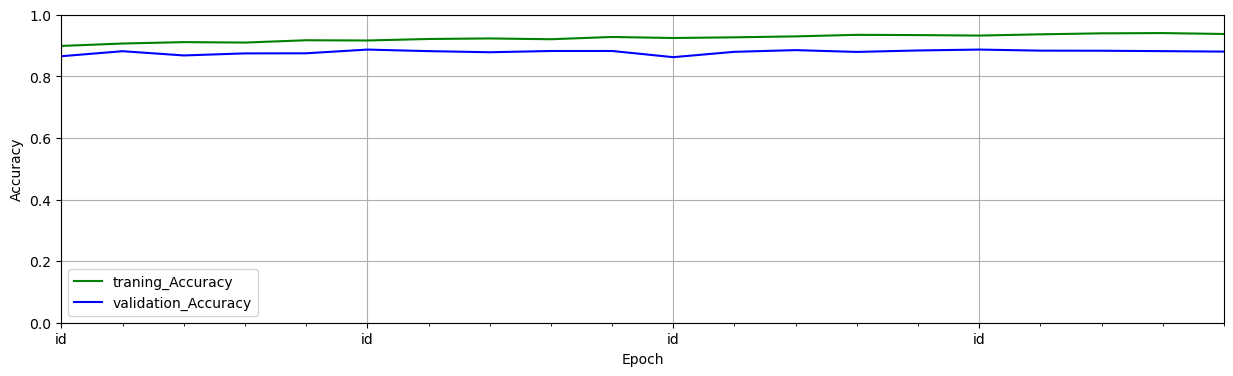

In [61]:
train_loss= history_overfit.history["loss"]
train_acc= history_overfit.history["accuracy"]
valid_loss= history_overfit.history["val_loss"]
valid_acc= history_overfit.history["val_accuracy"]

plot_results([ train_loss, valid_loss],
            ylabel="loss",
            ylim=[0.0, 5.0],
            metric_name=["traning_loss", "validation_loss"],
            color=["g","b"])

plot_results([train_acc, valid_acc],
            ylabel="Accuracy",
            ylim=[0, 1],
            metric_name=["traning_Accuracy", "validation_Accuracy"],
            color=['g','b'])

In [91]:
model_overfit.save('model_overfit')

INFO:tensorflow:Assets written to: model_overfit\assets


INFO:tensorflow:Assets written to: model_overfit\assets


In [92]:
from tensorflow.keras import models
reloaded_model = models.load_model('model_overfit')

In [93]:
test_loss, test_acc = reloaded_model.evaluate(x_test, y_test)
print(f"test accuracy: {test_acc*100:0.3f} ")

313/313 [==============================] - 4s 6ms/step - loss: 3757.8997 - accuracy: 0.4416
test accuracy: 44.160 


In [94]:
def evaluate_model(dataset, model):
    class_names = ['t-shirt',
                  'pants',
                  'sweater',
                  'dress',
                  'jacket',
                  'sandals',
                  'shirt',
                  'sneekers',
                  'bag',
                  'boots' ]
    num_rows = 3
    num_cols = 6
    
    
    data_batch = dataset[0:num_rows*num_cols]
    
    predictions = model.predict(data_batch)
    
    plt.figure(figsize=(20,8))
    num_matches=0
    
    for idx in range (num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx].reshape(28, 28))
        
        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])
        
        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={'fontsize':13})
        
        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color='g')
        else :
            plt.setp(title_obj, color='r')
            
        acc = num_matches/(idx+1)
        
    print ("prediction accuracy:", int(100*acc)/100)
    
    return

1/1 [==============================] - 0s 355ms/step
prediction accuracy: 0.5


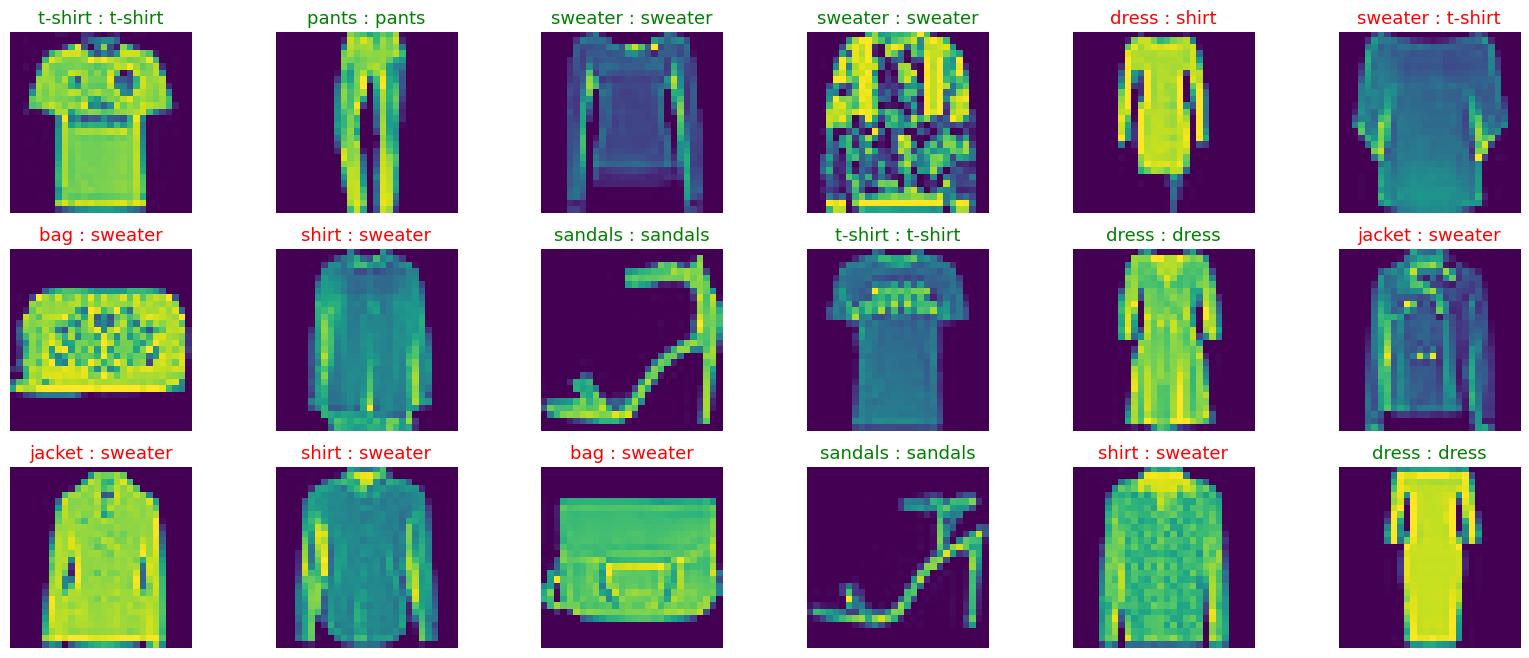

In [95]:
evaluate_model(x_test, reloaded_model)